### **METRIČNA DIMENZIJA SOSEDNOSTI \- KODA**



Pri tem projektu sta ključni kodi za izračun metrične dimenzije sosednosti \(dim\_A\(G\)\) in metrične dimenzije \(dim\(G\)\), ki sta napisani spodaj. 


In [1]:
def dim_A(G):
    vozlisca = G.vertices()
    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)  # Binarne spremenljivke za vozlišča
    matrika_sosednosti = G.adjacency_matrix()  

    # Pretvorimo seznam vozlišč v slovar za indeksiranje
    vozlisca_indeks = {v: i for i, v in enumerate(vozlisca)}

    # Ciljna funkcija: minimiziramo vsoto x[v] za v v V
    p.set_objective(sum(x[v] for v in vozlisca))

    # Dodajanje omejitev za vsako kombinacijo vozlišč (v, w)
    for v in vozlisca:
        for w in vozlisca:
            if v != w:
                omejitev = sum(
                    abs(matrika_sosednosti[vozlisca_indeks[u], vozlisca_indeks[v]] - 
                        matrika_sosednosti[vozlisca_indeks[u], vozlisca_indeks[w]]) * x[u]
                    for u in vozlisca)
                p.add_constraint(omejitev + x[v] + x[w] >= 1)

    # Rešimo linearni program
    p.solve()
    S = [v for v in vozlisca if p.get_values(x[v]) == 1]
    return int(p.get_objective_value()), S  # Vrne metrično dimenzijo sosednosti in množico

In [2]:
def dim(G):
    vozlisca = G.vertices()
    if not vozlisca:  # Če graf nima vozlišč
        return 0, []

    # Razdalje med vsemi pari vozlišč
    razdalje = G.distance_all_pairs()  # Vrne matriko razdalj v obliki slovarja

    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)  # Binarne spremenljivke za vozlišča

    # Ciljna funkcija: minimiziramo vsoto x[v] za v v V
    p.set_objective(sum(x[v] for v in vozlisca))

    # Omejitve: Za vsako dvojico vozlišč (v, w), razdalje morajo biti enolične
    for v in vozlisca:
        for w in vozlisca:
            if v != w:
                p.add_constraint(
                    sum(
                        abs(
                            razdalje.get(u, {}).get(v, 0) - razdalje.get(u, {}).get(w, 0)
                        ) * x[u]
                        for u in vozlisca
                    ) >= 1
                )

    # Rešimo linearni program
    p.solve()
    S = [v for v in vozlisca if p.get_values(x[v]) == 1]

    return int(p.get_objective_value()), S  # Vrne metrično dimenzijo in množico

S spodnjo kodo generiramo naključne grafe in jim zračunamo dim\_A in dim


Naključni povezan graf z verjetnostjo povezav 0.500000000000000:
  Vozlišča: [0, 1, 2]


Metrična dimenzija: 1
Metrična dimenzija sosednosti: 1
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.


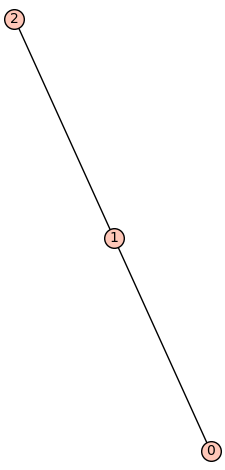

Naključni povezan graf z verjetnostjo povezav 0.500000000000000:
  Vozlišča: [0, 1, 2, 3]
Metrična dimenzija: 3
Metrična dimenzija sosednosti: 3
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.


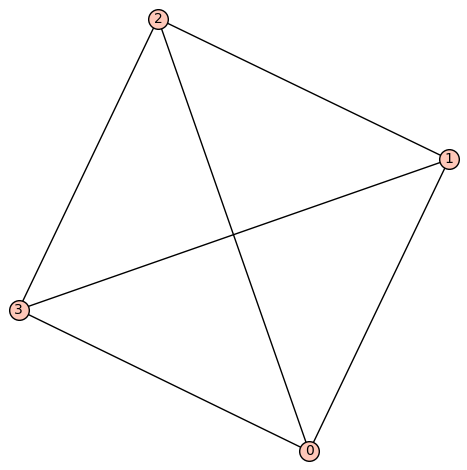

Naključni povezan graf z verjetnostjo povezav 0.500000000000000:
  Vozlišča: [0, 1, 2, 3, 4]
Metrična dimenzija: 2
Metrična dimenzija sosednosti: 2
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.


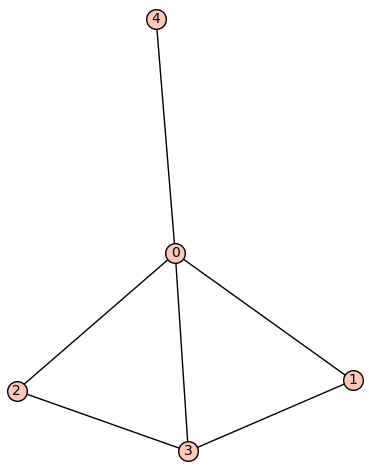

Naključni povezan graf z verjetnostjo povezav 0.500000000000000:
  Vozlišča: [0, 1, 2, 3, 4, 5]
Metrična dimenzija: 3
Metrična dimenzija sosednosti: 3
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.


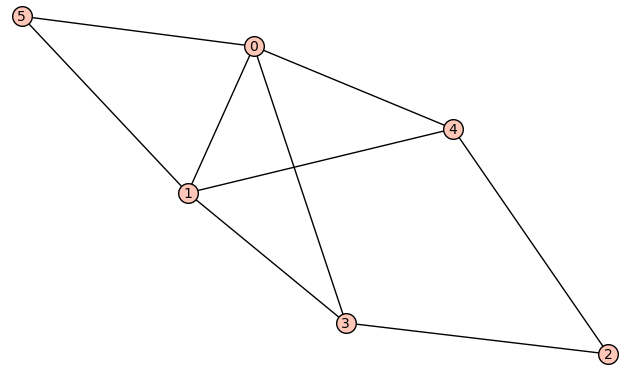

Naključni povezan graf z verjetnostjo povezav 0.500000000000000:
  Vozlišča: [0, 1, 2, 3, 4, 5, 6]
Metrična dimenzija: 3
Metrična dimenzija sosednosti: 3
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.


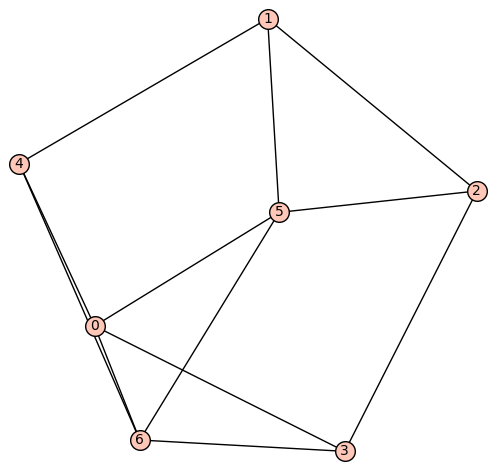

Naključni povezan graf z verjetnostjo povezav 0.500000000000000:
  Vozlišča: [0, 1, 2, 3, 4, 5, 6, 7]
Metrična dimenzija: 2
Metrična dimenzija sosednosti: 3
Metrična dimenzija in metrična dimenzija sosednosti sta RAZLIČNI.


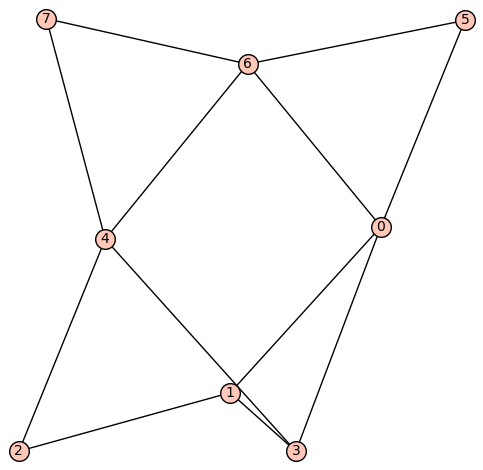

Naključni povezan graf z verjetnostjo povezav 0.500000000000000:
  Vozlišča: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Metrična dimenzija: 3
Metrična dimenzija sosednosti: 3
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.


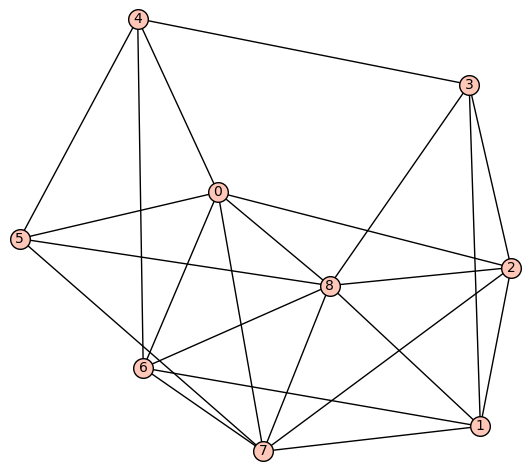

Naključni povezan graf z verjetnostjo povezav 0.500000000000000:
  Vozlišča: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Metrična dimenzija: 3
Metrična dimenzija sosednosti: 3
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.


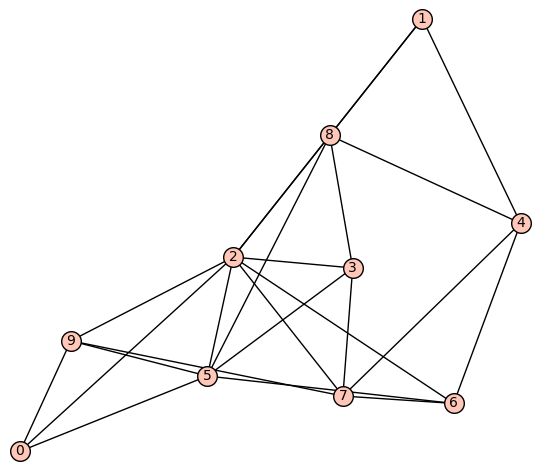

In [3]:
import random

def nakljucni_povezan_graf(st_vozlisc, verjetnost=0.5):
    
    while True:
        G = graphs.RandomGNP(st_vozlisc, verjetnost)
        
        # preverimo, če je graf povezan
        if G.is_connected():
            
            return G
        

    
for k in range(3,11):
    
    p = 0.5
    G = nakljucni_povezan_graf(k, p)
    
    print(f"Naključni povezan graf z verjetnostjo povezav {p}:")
    print(f"  Vozlišča: {G.vertices()}")
    
    metricna = dim(G)[0]
    metricna_sosednosti = dim_A(G)[0]

    print(f"Metrična dimenzija: {metricna}")
    print(f"Metrična dimenzija sosednosti: {metricna_sosednosti}")
    if metricna == metricna_sosednosti:
        print("Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.")
    else:
        print("Metrična dimenzija in metrična dimenzija sosednosti sta RAZLIČNI.")
        
    G.plot().show()

dim\_A\(G\) = dim\(A\) preverimo še na različnih družinah grafov.



Polni dvodelni grafi:
Graf (3, 3):
  Metrična dimenzija (dim(G)): 4
  Metrična dimenzija sosednosti (dim_A(G)): 4
  Enaki? Da


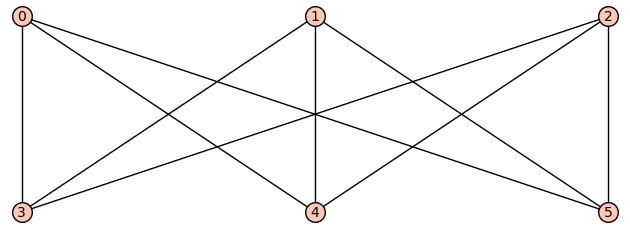

------------------------------


Graf (3, 4):
  Metrična dimenzija (dim(G)): 5
  Metrična dimenzija sosednosti (dim_A(G)): 5
  Enaki? Da


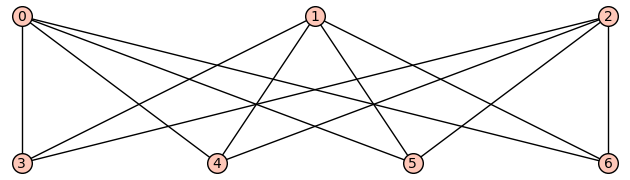

------------------------------


Graf (3, 5):
  Metrična dimenzija (dim(G)): 6
  Metrična dimenzija sosednosti (dim_A(G)): 6
  Enaki? Da


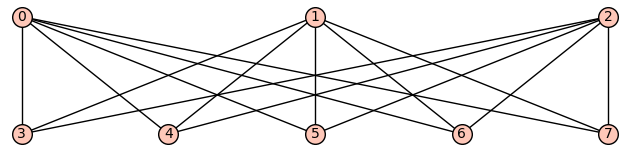

------------------------------


Graf (3, 6):
  Metrična dimenzija (dim(G)): 7
  Metrična dimenzija sosednosti (dim_A(G)): 7
  Enaki? Da


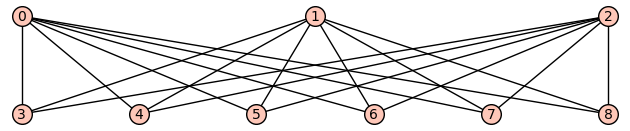

------------------------------


Graf (3, 7):
  Metrična dimenzija (dim(G)): 8
  Metrična dimenzija sosednosti (dim_A(G)): 8
  Enaki? Da


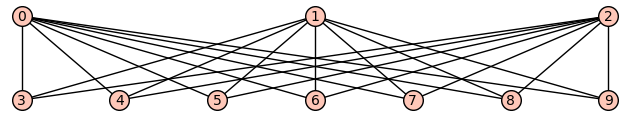

------------------------------
Graf (3, 8):
  Metrična dimenzija (dim(G)): 9
  Metrična dimenzija sosednosti (dim_A(G)): 9
  Enaki? Da


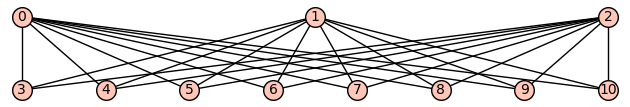

------------------------------
Graf (3, 9):
  Metrična dimenzija (dim(G)): 10
  Metrična dimenzija sosednosti (dim_A(G)): 10
  Enaki? Da


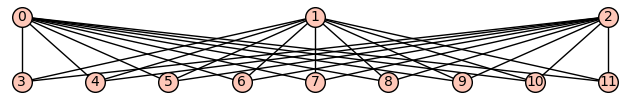

------------------------------
Graf (4, 3):
  Metrična dimenzija (dim(G)): 5
  Metrična dimenzija sosednosti (dim_A(G)): 5
  Enaki? Da


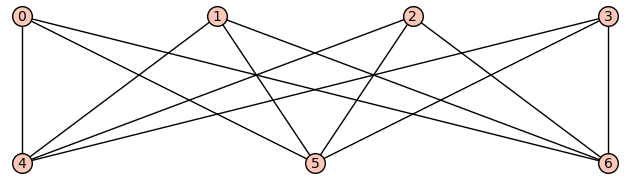

------------------------------
Graf (4, 4):
  Metrična dimenzija (dim(G)): 6
  Metrična dimenzija sosednosti (dim_A(G)): 6
  Enaki? Da


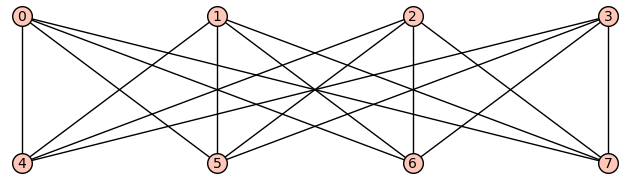

------------------------------
Graf (4, 5):
  Metrična dimenzija (dim(G)): 7
  Metrična dimenzija sosednosti (dim_A(G)): 7
  Enaki? Da


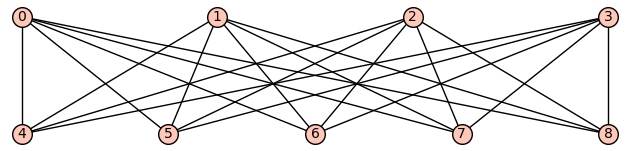

------------------------------
Graf (4, 6):
  Metrična dimenzija (dim(G)): 8
  Metrična dimenzija sosednosti (dim_A(G)): 8
  Enaki? Da


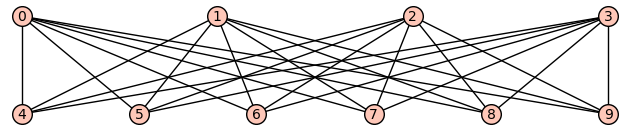

------------------------------
Graf (4, 7):
  Metrična dimenzija (dim(G)): 9
  Metrična dimenzija sosednosti (dim_A(G)): 9
  Enaki? Da


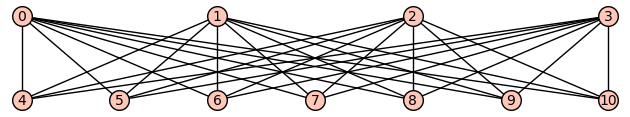

------------------------------
Graf (4, 8):
  Metrična dimenzija (dim(G)): 10
  Metrična dimenzija sosednosti (dim_A(G)): 10
  Enaki? Da


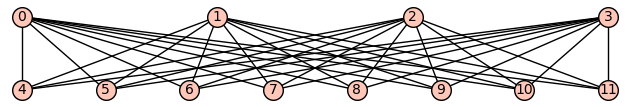

------------------------------
Graf (4, 9):
  Metrična dimenzija (dim(G)): 11
  Metrična dimenzija sosednosti (dim_A(G)): 11
  Enaki? Da


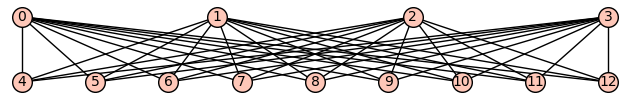

------------------------------
Graf (5, 3):
  Metrična dimenzija (dim(G)): 6
  Metrična dimenzija sosednosti (dim_A(G)): 6
  Enaki? Da


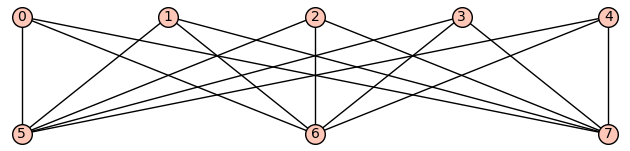

------------------------------
Graf (5, 4):
  Metrična dimenzija (dim(G)): 7
  Metrična dimenzija sosednosti (dim_A(G)): 7
  Enaki? Da


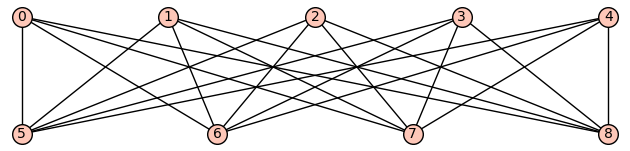

------------------------------
Graf (5, 5):
  Metrična dimenzija (dim(G)): 8
  Metrična dimenzija sosednosti (dim_A(G)): 8
  Enaki? Da


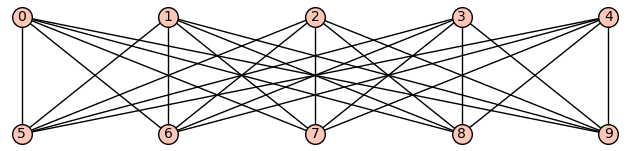

------------------------------
Graf (5, 6):
  Metrična dimenzija (dim(G)): 9
  Metrična dimenzija sosednosti (dim_A(G)): 9
  Enaki? Da


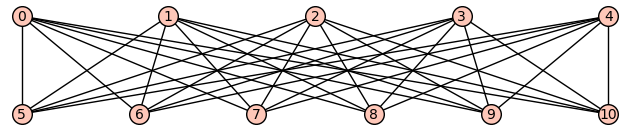

------------------------------
Graf (5, 7):
  Metrična dimenzija (dim(G)): 10
  Metrična dimenzija sosednosti (dim_A(G)): 10
  Enaki? Da


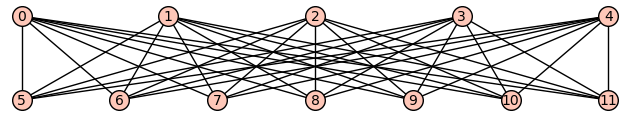

------------------------------
Graf (5, 8):
  Metrična dimenzija (dim(G)): 11
  Metrična dimenzija sosednosti (dim_A(G)): 11
  Enaki? Da


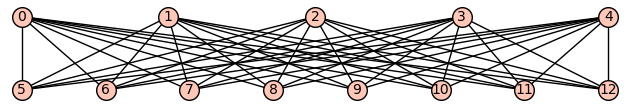

------------------------------
Graf (5, 9):
  Metrična dimenzija (dim(G)): 12
  Metrična dimenzija sosednosti (dim_A(G)): 12
  Enaki? Da


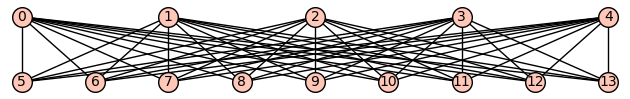

------------------------------
Graf (6, 3):
  Metrična dimenzija (dim(G)): 7
  Metrična dimenzija sosednosti (dim_A(G)): 7
  Enaki? Da


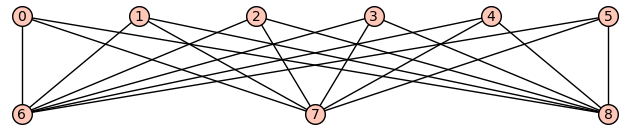

------------------------------
Graf (6, 4):
  Metrična dimenzija (dim(G)): 8
  Metrična dimenzija sosednosti (dim_A(G)): 8
  Enaki? Da


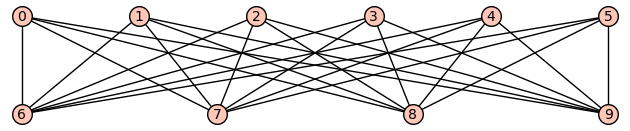

------------------------------


Graf (6, 5):
  Metrična dimenzija (dim(G)): 9
  Metrična dimenzija sosednosti (dim_A(G)): 9
  Enaki? Da


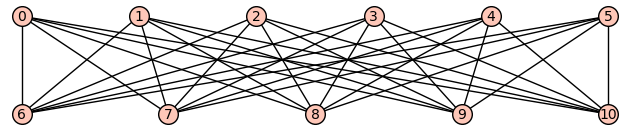

------------------------------


Graf (6, 6):
  Metrična dimenzija (dim(G)): 10
  Metrična dimenzija sosednosti (dim_A(G)): 10
  Enaki? Da


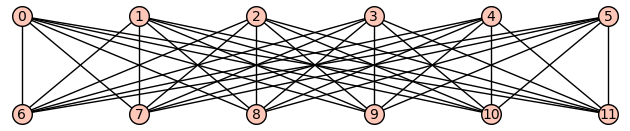

------------------------------


Graf (6, 7):
  Metrična dimenzija (dim(G)): 11
  Metrična dimenzija sosednosti (dim_A(G)): 11
  Enaki? Da


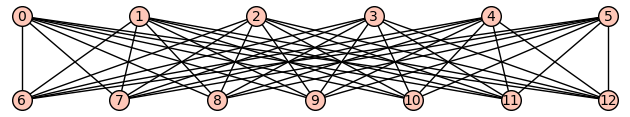

------------------------------


Graf (6, 8):
  Metrična dimenzija (dim(G)): 12
  Metrična dimenzija sosednosti (dim_A(G)): 12
  Enaki? Da


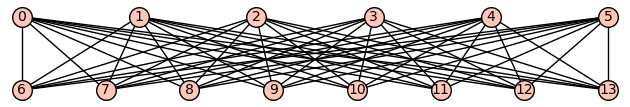

------------------------------


Graf (6, 9):
  Metrična dimenzija (dim(G)): 13
  Metrična dimenzija sosednosti (dim_A(G)): 13
  Enaki? Da


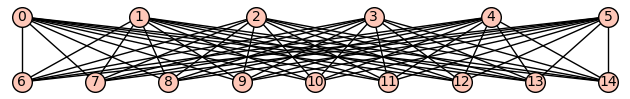

------------------------------
Graf (7, 3):
  Metrična dimenzija (dim(G)): 8
  Metrična dimenzija sosednosti (dim_A(G)): 8
  Enaki? Da


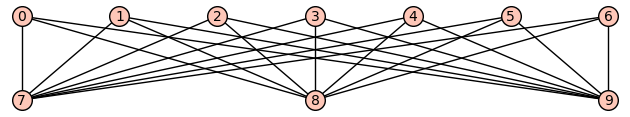

------------------------------
Graf (7, 4):
  Metrična dimenzija (dim(G)): 9
  Metrična dimenzija sosednosti (dim_A(G)): 9
  Enaki? Da


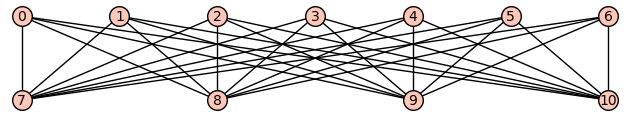

------------------------------
Graf (7, 5):
  Metrična dimenzija (dim(G)): 10
  Metrična dimenzija sosednosti (dim_A(G)): 10
  Enaki? Da


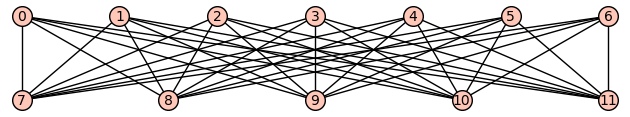

------------------------------


Graf (7, 6):
  Metrična dimenzija (dim(G)): 11
  Metrična dimenzija sosednosti (dim_A(G)): 11
  Enaki? Da


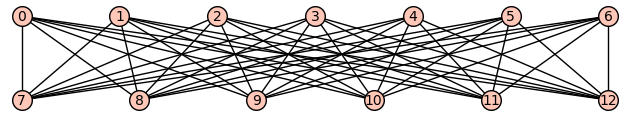

------------------------------


Graf (7, 7):
  Metrična dimenzija (dim(G)): 12
  Metrična dimenzija sosednosti (dim_A(G)): 12
  Enaki? Da


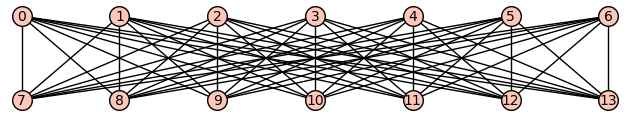

------------------------------


Graf (7, 8):
  Metrična dimenzija (dim(G)): 13
  Metrična dimenzija sosednosti (dim_A(G)): 13
  Enaki? Da


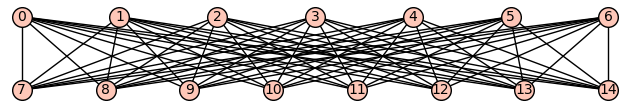

------------------------------


Graf (7, 9):
  Metrična dimenzija (dim(G)): 14
  Metrična dimenzija sosednosti (dim_A(G)): 14
  Enaki? Da


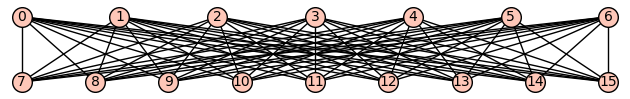

------------------------------
Graf (8, 3):
  Metrična dimenzija (dim(G)): 9
  Metrična dimenzija sosednosti (dim_A(G)): 9
  Enaki? Da


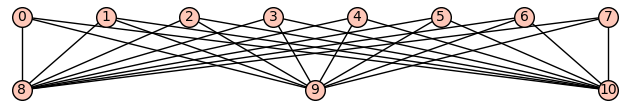

------------------------------
Graf (8, 4):
  Metrična dimenzija (dim(G)): 10
  Metrična dimenzija sosednosti (dim_A(G)): 10
  Enaki? Da


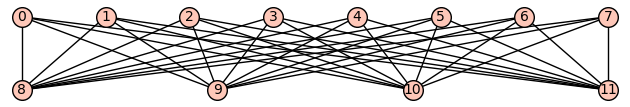

------------------------------
Graf (8, 5):
  Metrična dimenzija (dim(G)): 11
  Metrična dimenzija sosednosti (dim_A(G)): 11
  Enaki? Da


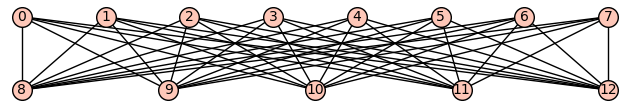

------------------------------


Graf (8, 6):
  Metrična dimenzija (dim(G)): 12
  Metrična dimenzija sosednosti (dim_A(G)): 12
  Enaki? Da


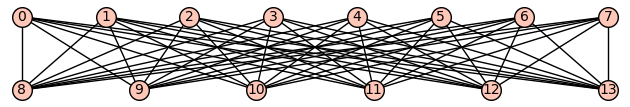

------------------------------


Graf (8, 7):
  Metrična dimenzija (dim(G)): 13
  Metrična dimenzija sosednosti (dim_A(G)): 13
  Enaki? Da


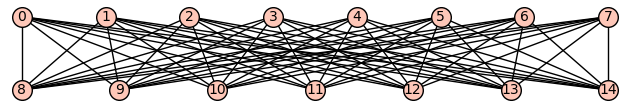

------------------------------


Graf (8, 8):
  Metrična dimenzija (dim(G)): 14
  Metrična dimenzija sosednosti (dim_A(G)): 14
  Enaki? Da


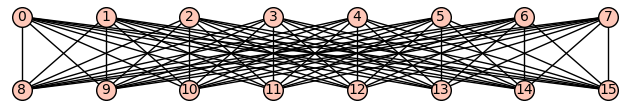

------------------------------


Graf (8, 9):
  Metrična dimenzija (dim(G)): 15
  Metrična dimenzija sosednosti (dim_A(G)): 15
  Enaki? Da


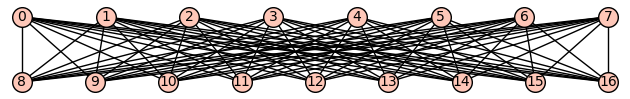

------------------------------
Graf (9, 3):
  Metrična dimenzija (dim(G)): 10
  Metrična dimenzija sosednosti (dim_A(G)): 10
  Enaki? Da


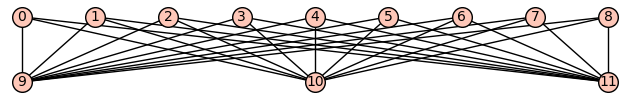

------------------------------


Graf (9, 4):
  Metrična dimenzija (dim(G)): 11
  Metrična dimenzija sosednosti (dim_A(G)): 11
  Enaki? Da


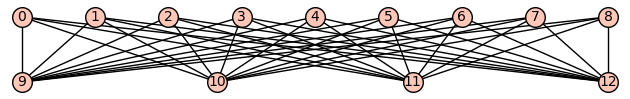

------------------------------


Graf (9, 5):
  Metrična dimenzija (dim(G)): 12
  Metrična dimenzija sosednosti (dim_A(G)): 12
  Enaki? Da


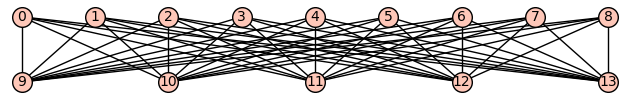

------------------------------


Graf (9, 6):
  Metrična dimenzija (dim(G)): 13
  Metrična dimenzija sosednosti (dim_A(G)): 13
  Enaki? Da


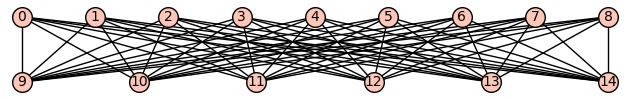

------------------------------


Graf (9, 7):
  Metrična dimenzija (dim(G)): 14
  Metrična dimenzija sosednosti (dim_A(G)): 14
  Enaki? Da


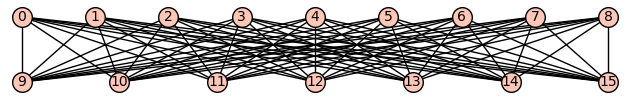

------------------------------


Graf (9, 8):
  Metrična dimenzija (dim(G)): 15
  Metrična dimenzija sosednosti (dim_A(G)): 15
  Enaki? Da


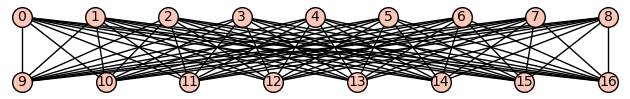

------------------------------


Graf (9, 9):
  Metrična dimenzija (dim(G)): 16
  Metrična dimenzija sosednosti (dim_A(G)): 16
  Enaki? Da


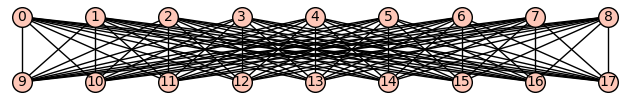

------------------------------


In [4]:
print("Polni dvodelni grafi:")
for n in range(3,10):
    for m in range(3,10):
        
        G = graphs.CompleteBipartiteGraph(n, m)
        
        dim_mat = dim(G)[0]
        dim_mat_s = dim_A(G)[0]
        enake = dim_mat == dim_mat_s
        
        print(f"Graf {n,m}:")
        print(f"  Metrična dimenzija (dim(G)): {dim_mat}")
        print(f"  Metrična dimenzija sosednosti (dim_A(G)): {dim_mat_s}")
        print(f"  Enaki? {'Da' if enake else 'Ne'}")
        G.plot().show()
        print("-" * 30)

------------------------------
Primerjava metričnih dimenzij za število vozlišč 3:
------------------------------
Graf 1:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 2
  Enaki? Da
------------------------------


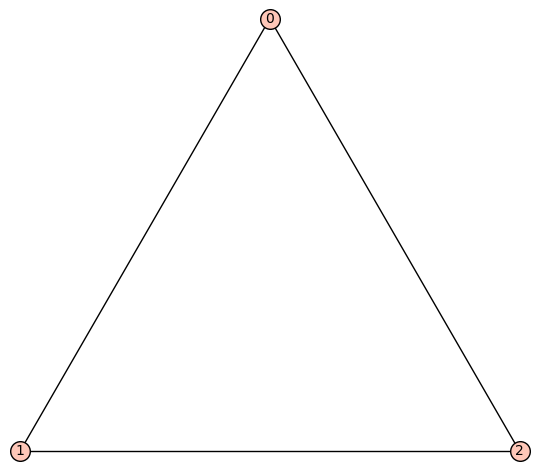

Graf 2:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 2
  Enaki? Da
------------------------------


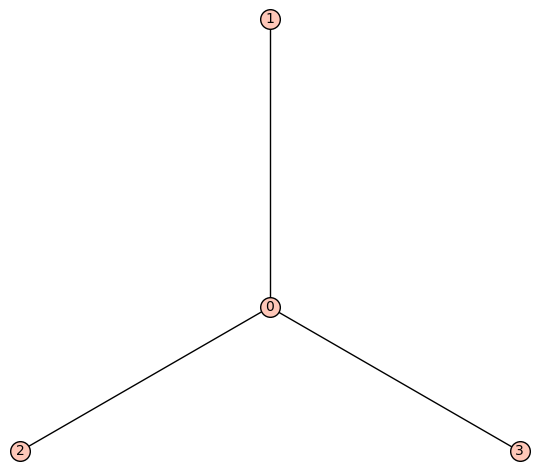

Graf 3:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 2
  Enaki? Da
------------------------------


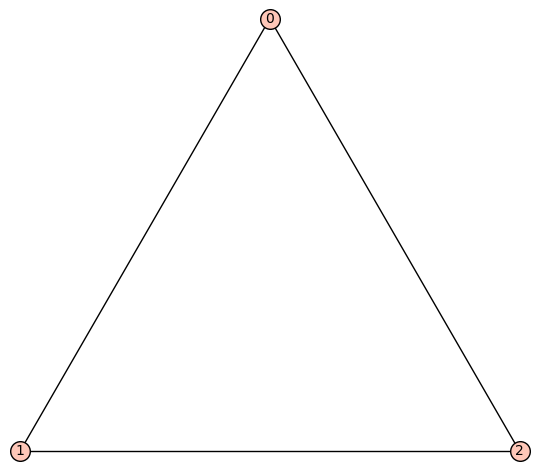

Graf 4:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 3
  Enaki? Ne
------------------------------


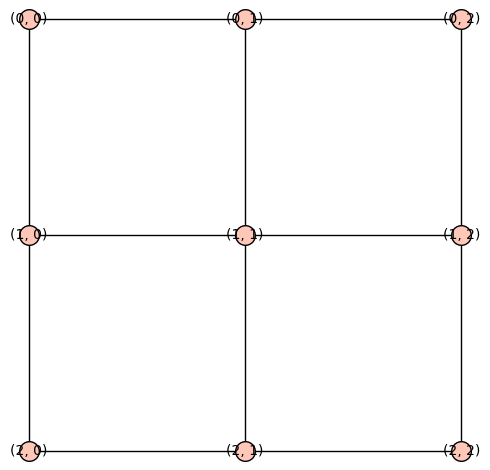

------------------------------
Primerjava metričnih dimenzij za število vozlišč 4:
------------------------------
Graf 1:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 2
  Enaki? Da
------------------------------


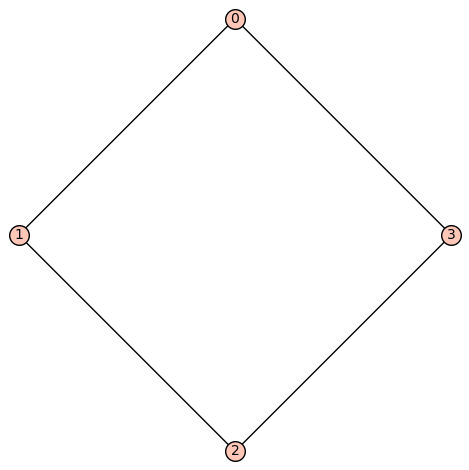

Graf 2:
  Metrična dimenzija (dim(G)): 3
  Metrična dimenzija sosednosti (dim_A(G)): 3
  Enaki? Da
------------------------------


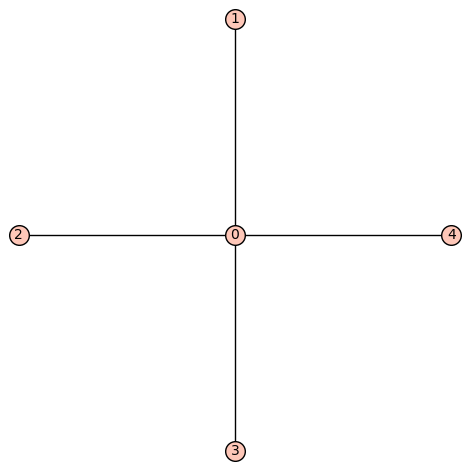

Graf 3:
  Metrična dimenzija (dim(G)): 3
  Metrična dimenzija sosednosti (dim_A(G)): 3
  Enaki? Da
------------------------------


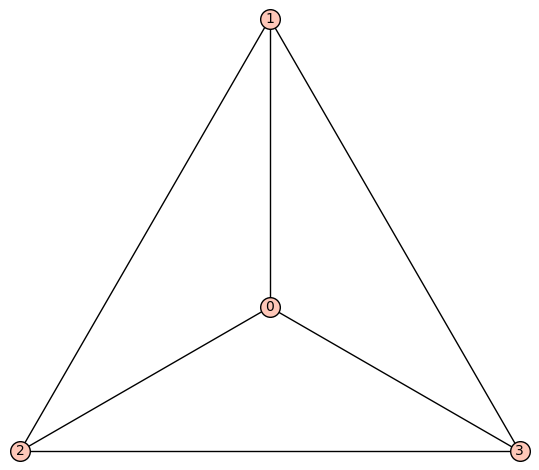

Graf 4:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 6
  Enaki? Ne
------------------------------


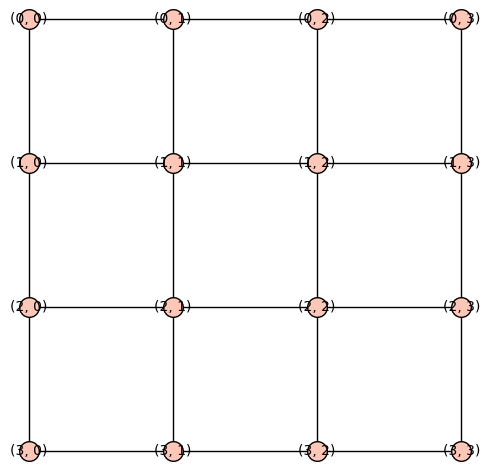

------------------------------
Primerjava metričnih dimenzij za število vozlišč 5:
------------------------------
Graf 1:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 2
  Enaki? Da
------------------------------


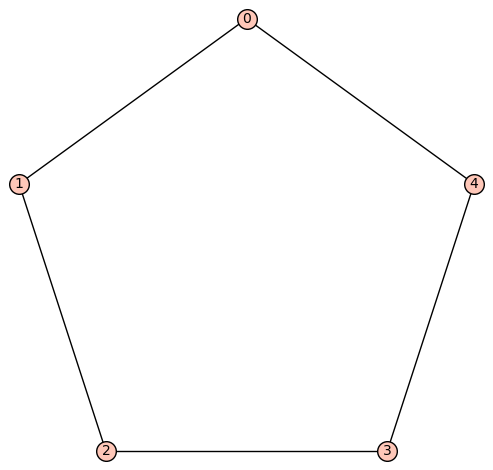

Graf 2:
  Metrična dimenzija (dim(G)): 4
  Metrična dimenzija sosednosti (dim_A(G)): 4
  Enaki? Da
------------------------------


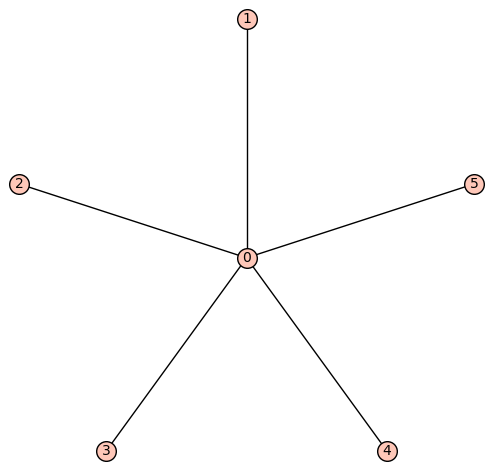

Graf 3:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 2
  Enaki? Da
------------------------------


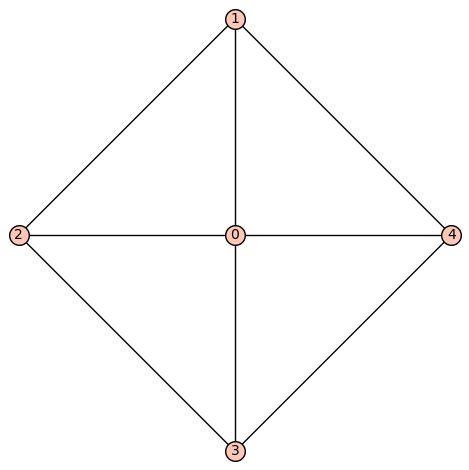

Graf 4:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 9
  Enaki? Ne
------------------------------


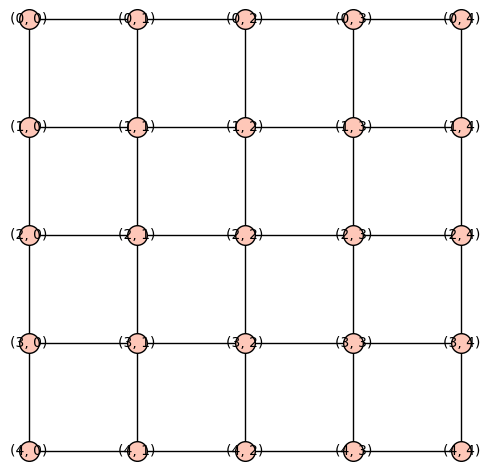

------------------------------
Primerjava metričnih dimenzij za število vozlišč 6:
------------------------------
Graf 1:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 2
  Enaki? Da
------------------------------


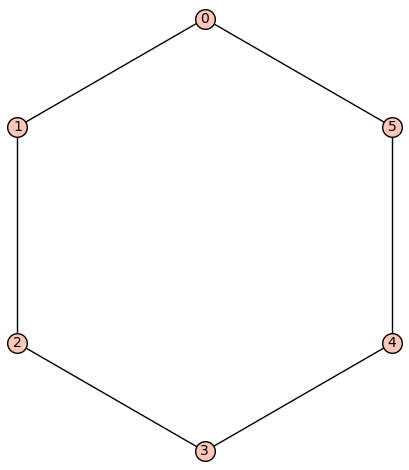

Graf 2:
  Metrična dimenzija (dim(G)): 5
  Metrična dimenzija sosednosti (dim_A(G)): 5
  Enaki? Da
------------------------------


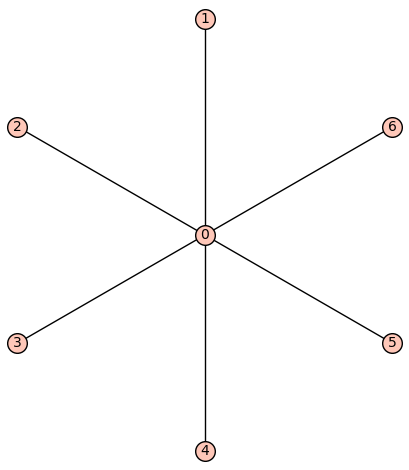

Graf 3:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 2
  Enaki? Da
------------------------------


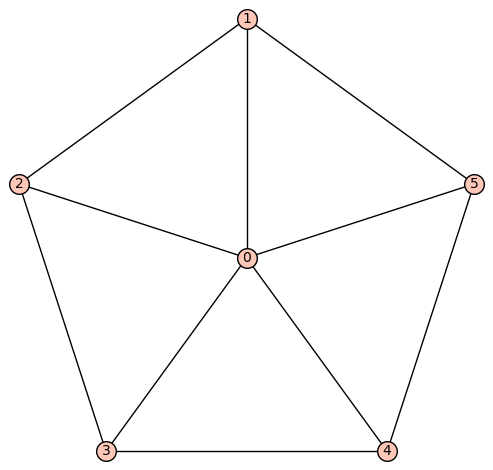

Graf 4:
  Metrična dimenzija (dim(G)): 2
  Metrična dimenzija sosednosti (dim_A(G)): 12
  Enaki? Ne
------------------------------


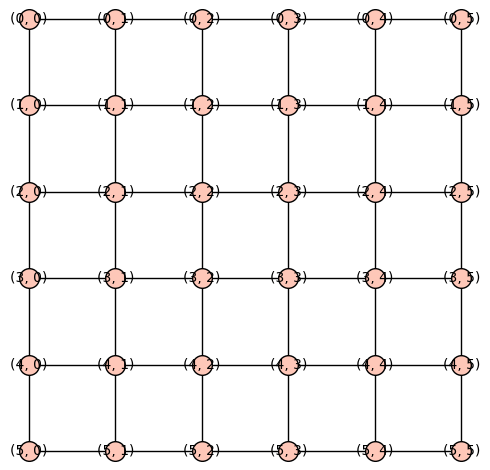

In [5]:
for n in range(3,7):
    
    grafi = [
        graphs.CycleGraph(n),
        graphs.StarGraph(n),
        graphs.WheelGraph(n),
        graphs.Grid2dGraph(n, n),
    ]

    print("-" * 30)
    print(f"Primerjava metričnih dimenzij za število vozlišč {n}:")
    print("-" * 30)

    for i, G in enumerate(grafi, 1):
        
        dim_mat = dim(G)[0]
        dim_mat_s = dim_A(G)[0]
        enake = dim_mat == dim_mat_s
        
        print(f"Graf {i}:")
        print(f"  Metrična dimenzija (dim(G)): {dim_mat}")
        print(f"  Metrična dimenzija sosednosti (dim_A(G)): {dim_mat_s}")
        print(f"  Enaki? {'Da' if enake else 'Ne'}")
        print("-" * 30)
        
        G.plot().show()

###### METRIČNA DIMENZIJA SOSEDNOSTI NA PRODUKTIH GRAFOV



Zgeneriramo mrežne grafe z različnim številom vozlišč ter njihove kartezične, direktne in krepke produkte. 


Metrična dimenzija sosednosti prve poti: 1
Metrična dimenzija sosednosti druge poti: 1
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2


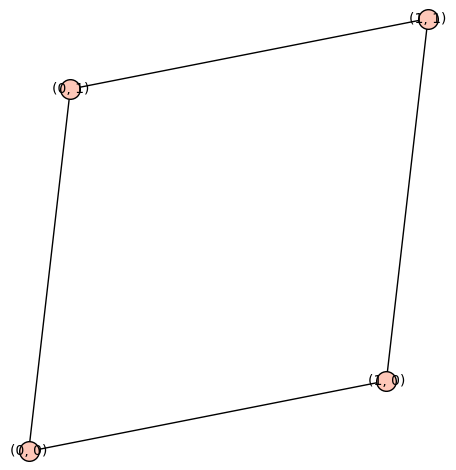

Metrična dimenzija sosednosti prve poti: 1
Metrična dimenzija sosednosti druge poti: 1
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2


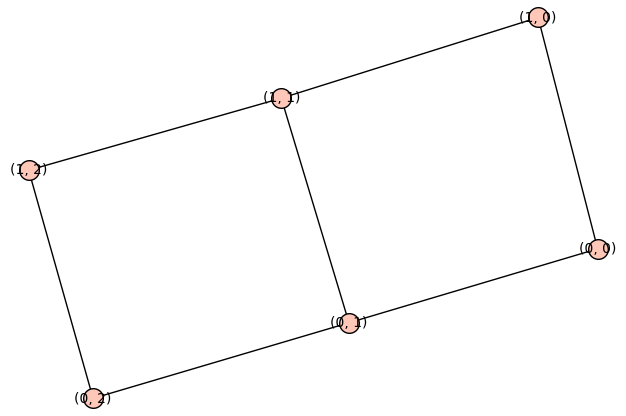

Metrična dimenzija sosednosti prve poti: 1
Metrična dimenzija sosednosti druge poti: 2
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 3


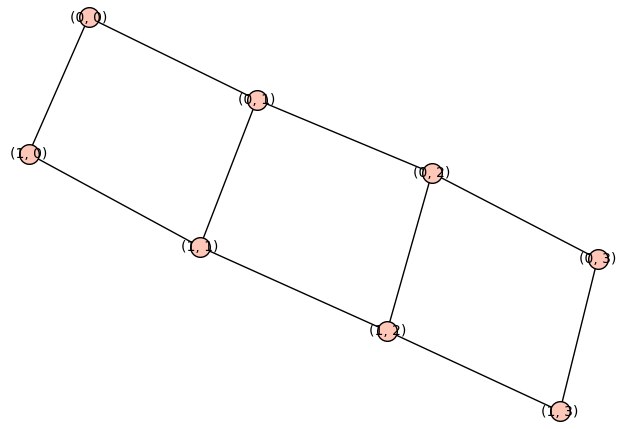

Metrična dimenzija sosednosti prve poti: 1
Metrična dimenzija sosednosti druge poti: 1
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2


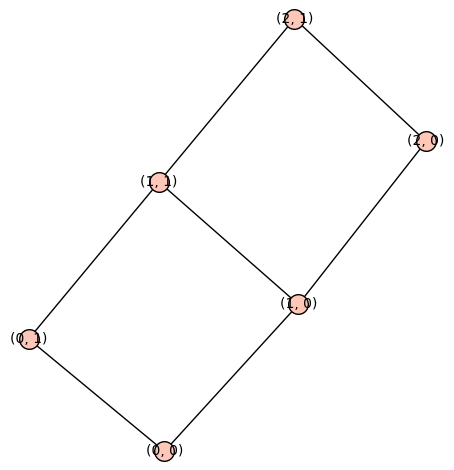

Metrična dimenzija sosednosti prve poti: 1
Metrična dimenzija sosednosti druge poti: 1
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 3


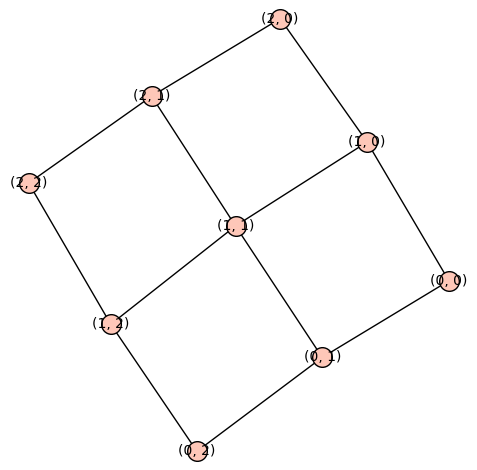

Metrična dimenzija sosednosti prve poti: 1
Metrična dimenzija sosednosti druge poti: 2
Metrična dimenzija grafa: 2


Metrična dimenzija sosednosti grafa: 5


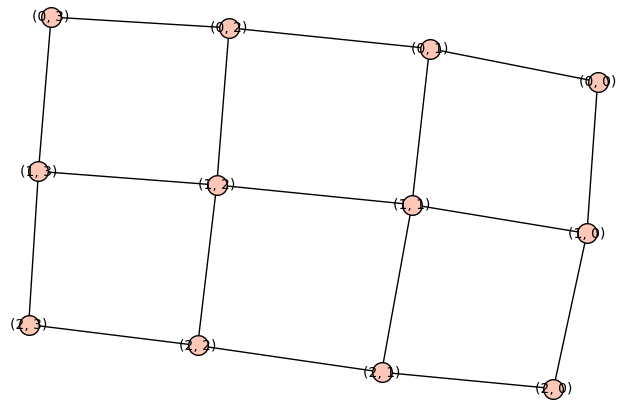

Metrična dimenzija sosednosti prve poti: 2
Metrična dimenzija sosednosti druge poti: 1
Metrična dimenzija grafa: 2


Metrična dimenzija sosednosti grafa: 3


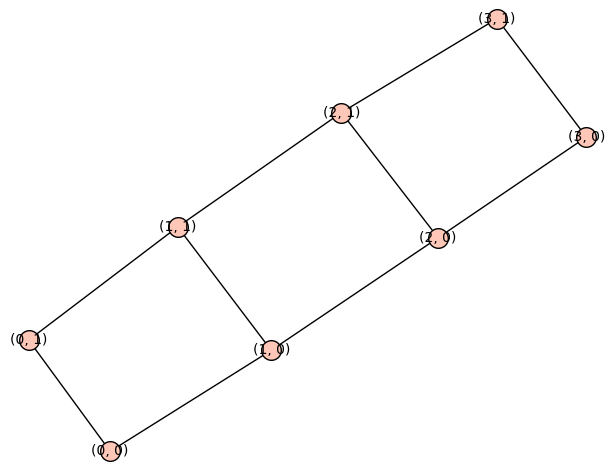

Metrična dimenzija sosednosti prve poti: 2
Metrična dimenzija sosednosti druge poti: 1
Metrična dimenzija grafa: 2


Metrična dimenzija sosednosti grafa: 5

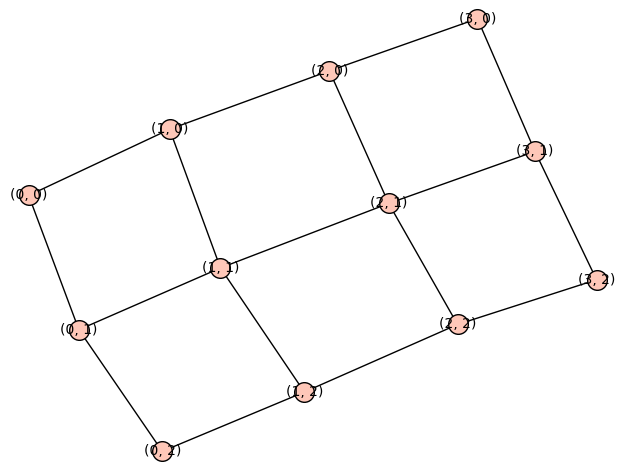

Metrična dimenzija sosednosti prve poti: 2
Metrična dimenzija sosednosti druge poti: 2


Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 6


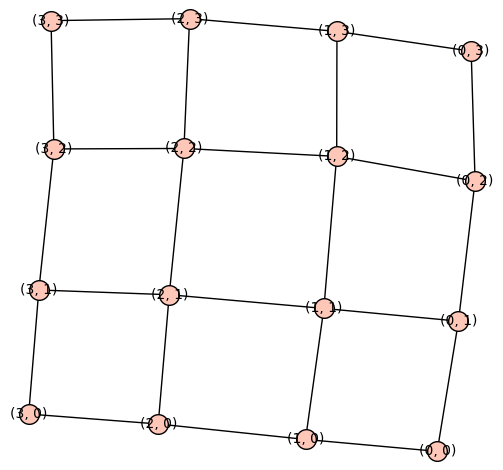

In [6]:
def mrezni_graf(n, m):
    
    P1 = graphs.PathGraph(n)  
    P2 = graphs.PathGraph(m) 
    
    print(f"Metrična dimenzija sosednosti prve poti: {dim_A(P1)[0]}")
    print(f"Metrična dimenzija sosednosti druge poti: {dim_A(P2)[0]}")
    
    mrezni_graf = P1.cartesian_product(P2)
    
    print(f"Metrična dimenzija grafa: {dim(mrezni_graf)[0]}")
    print(f"Metrična dimenzija sosednosti grafa: {dim_A(mrezni_graf)[0]}")

    return mrezni_graf



for n in range(2,5):
    for m in range(2,5):
        
        M = mrezni_graf(n,m)
        
        M.plot().show()

Produkti mrežnih grafov:

Prvi mrežni graf:
Metrična dimenzija sosednosti prve poti: 1
Metrična dimenzija sosednosti druge poti: 1
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.

Drugi mrežni graf:
Metrična dimenzija sosednosti prve poti: 1
Metrična dimenzija sosednosti druge poti: 1
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.

Kartezični produkt grafov:
Metrična dimenzija: 4


Metrična dimenzija sosednosti: 6


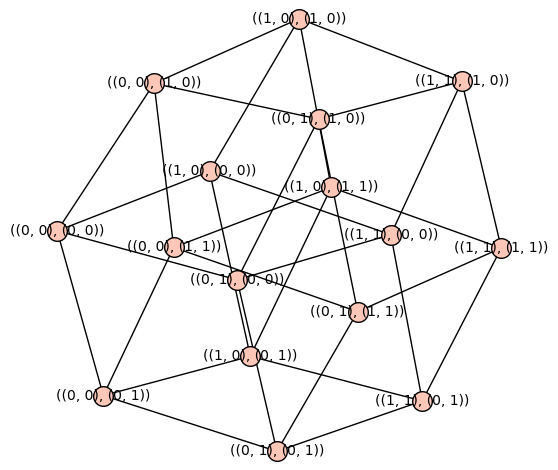

Direktni produkt grafov:


Metrična dimenzija: 12
Metrična dimenzija sosednosti: 12


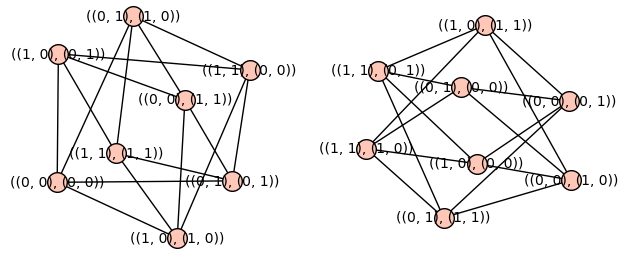

Krepki produkt grafov:
Metrična dimenzija: 5
Metrična dimenzija sosednosti: 5


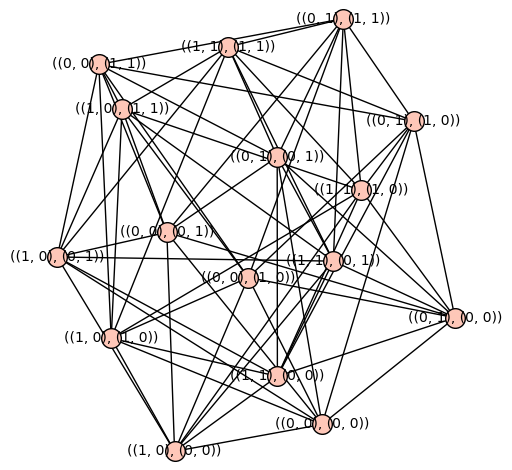

In [7]:
print("Produkti mrežnih grafov:")
print("")

n = 2
m = 2    
        
print("Prvi mrežni graf:")
M1 = mrezni_graf(n,m)
if dim(M1)[0] == dim_A(M1)[0]:
    print("Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.")
else:
    print("Metrična dimenzija in metrična dimenzija sosednosti sta RAZLIČNI.")
print("")


print("Drugi mrežni graf:")
M2 = mrezni_graf(n,m)
if dim(M2)[0] == dim_A(M2)[0]:
    print("Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.")
else:
    print("Metrična dimenzija in metrična dimenzija sosednosti sta RAZLIČNI.")
print("")


#1.  # izračunamo kartezični produkt
print("Kartezični produkt grafov:")
H1 = M1.cartesian_product(M2)

    # izpišemo podatke
print(f"Metrična dimenzija: {dim(H1)[0]}")
print(f"Metrična dimenzija sosednosti: {dim_A(H1)[0]}")
    
    # narišemo graf
H1.plot().show()


#2.  # izračunamo direktni produkt
print("Direktni produkt grafov:")
H2 = M1.tensor_product(M2)
    
    # izpišemo podatke
print(f"Metrična dimenzija: {dim(H2)[0]}")
print(f"Metrična dimenzija sosednosti: {dim_A(H2)[0]}")
    
    # narišemo graf
H2.plot().show()

    
#3.  # izračunamo krepki produkt
print("Krepki produkt grafov:")
H3 = M1.strong_product(M2)
    
    # izpišemo podatke
print(f"Metrična dimenzija: {dim(H3)[0]}")
print(f"Metrična dimenzija sosednosti: {dim_A(H3)[0]}")
    
    # narišemo graf   
H3.plot().show()

Enako kot za mrežne grafe naredimo še za torusne mrežne grafe.


Metrična dimenzija sosednosti prvega cikla: 1
Metrična dimenzija sosednosti drugega cikla: 1
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2


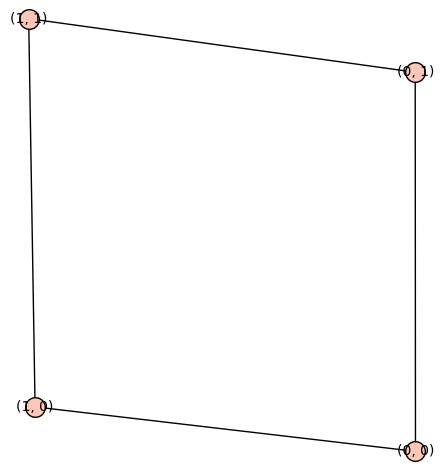

Metrična dimenzija sosednosti prvega cikla: 1
Metrična dimenzija sosednosti drugega cikla: 2
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2


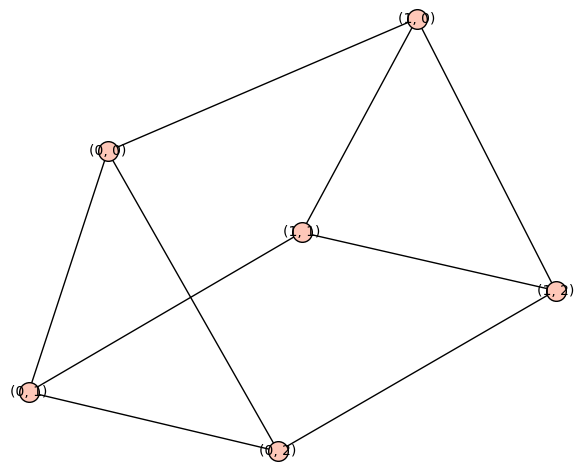

Metrična dimenzija sosednosti prvega cikla: 1
Metrična dimenzija sosednosti drugega cikla: 2
Metrična dimenzija grafa: 3
Metrična dimenzija sosednosti grafa: 3


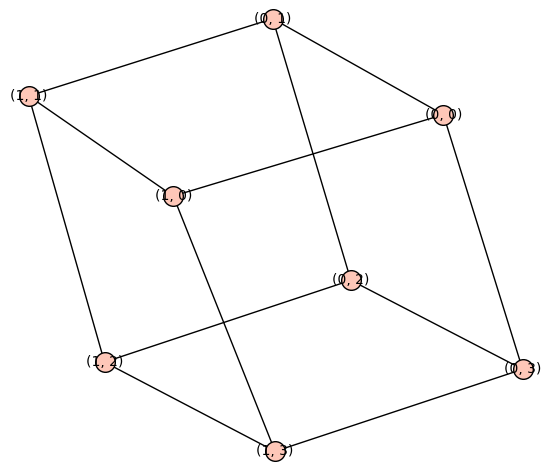

Metrična dimenzija sosednosti prvega cikla: 2
Metrična dimenzija sosednosti drugega cikla: 1
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2


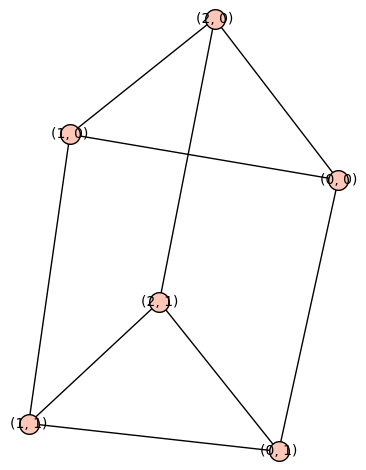

Metrična dimenzija sosednosti prvega cikla: 2
Metrična dimenzija sosednosti drugega cikla: 2
Metrična dimenzija grafa: 3
Metrična dimenzija sosednosti grafa: 3


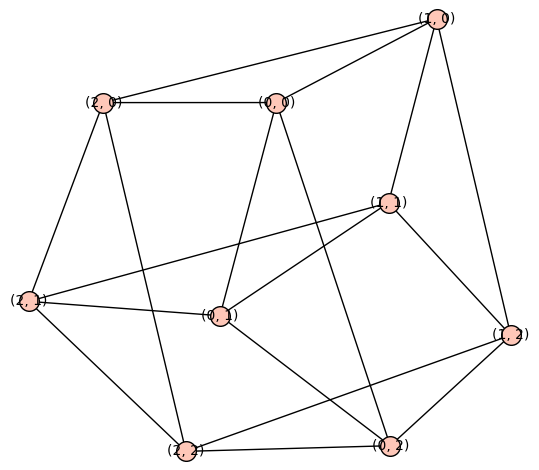

Metrična dimenzija sosednosti prvega cikla: 2
Metrična dimenzija sosednosti drugega cikla: 2
Metrična dimenzija grafa: 3
Metrična dimenzija sosednosti grafa: 4


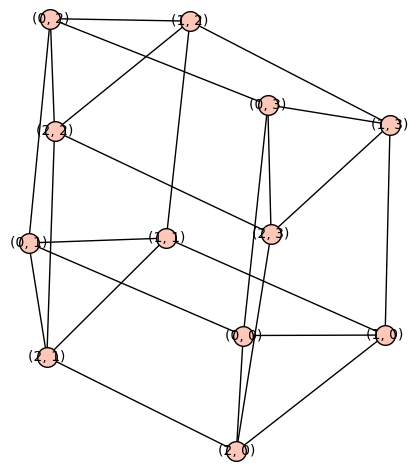

Metrična dimenzija sosednosti prvega cikla: 2
Metrična dimenzija sosednosti drugega cikla: 1
Metrična dimenzija grafa: 3
Metrična dimenzija sosednosti grafa: 3


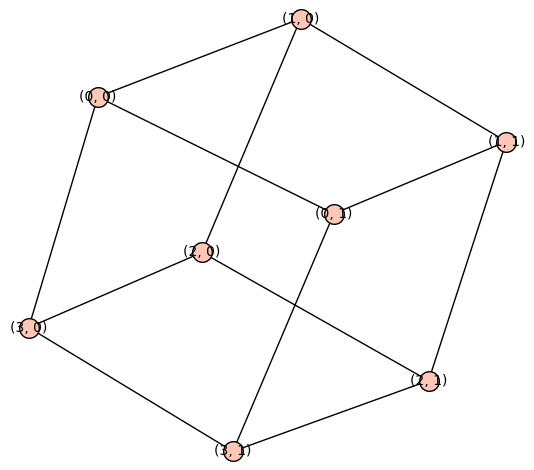

Metrična dimenzija sosednosti prvega cikla: 2
Metrična dimenzija sosednosti drugega cikla: 2
Metrična dimenzija grafa: 3


Metrična dimenzija sosednosti grafa: 4


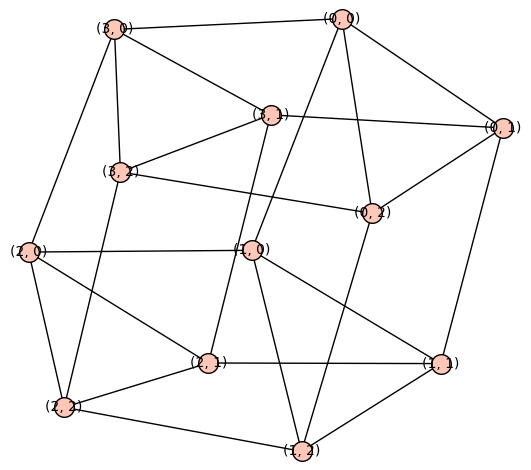

Metrična dimenzija sosednosti prvega cikla: 2
Metrična dimenzija sosednosti drugega cikla: 2


Metrična dimenzija grafa: 4
Metrična dimenzija sosednosti grafa: 6


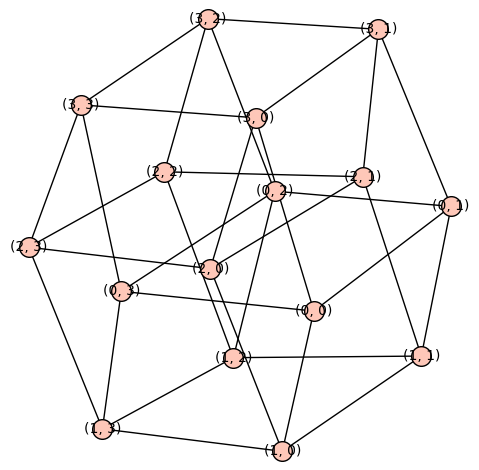

In [10]:
def torusni_mrezni_graf(n, m):
    
    C1 = graphs.CycleGraph(n)  
    C2 = graphs.CycleGraph(m) 
    
    print(f"Metrična dimenzija sosednosti prvega cikla: {dim_A(C1)[0]}")
    print(f"Metrična dimenzija sosednosti drugega cikla: {dim_A(C2)[0]}")
    
    torusni_mrezni_graf = C1.cartesian_product(C2)
    
    print(f"Metrična dimenzija grafa: {dim(torusni_mrezni_graf)[0]}")
    print(f"Metrična dimenzija sosednosti grafa: {dim_A(torusni_mrezni_graf)[0]}")

    return torusni_mrezni_graf

for n in range(2,5):
    for m in range(2,5):
        
        T = torusni_mrezni_graf(n,m)
        
        T.plot().show()

Produkti torusnih mrežnih grafov:

Prvi torusni mrežni graf:
Metrična dimenzija sosednosti prvega cikla: 1
Metrična dimenzija sosednosti drugega cikla: 1
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.

Drugi torusni mrežni graf:
Metrična dimenzija sosednosti prvega cikla: 1
Metrična dimenzija sosednosti drugega cikla: 2
Metrična dimenzija grafa: 2
Metrična dimenzija sosednosti grafa: 2
Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.

Kartezični produkt grafov:


Metrična dimenzija: 3


Metrična dimenzija sosednosti: 7


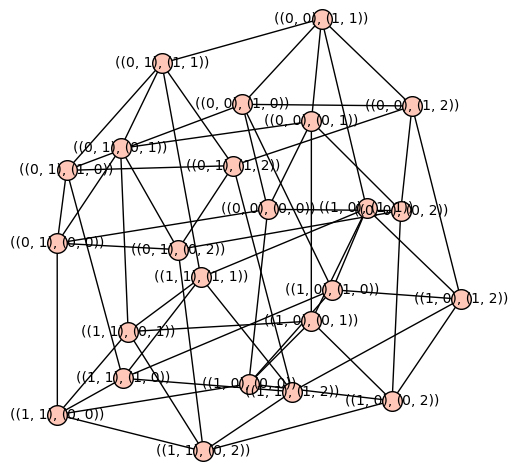

Direktni produkt grafov:
Metrična dimenzija: 12


Metrična dimenzija sosednosti: 12


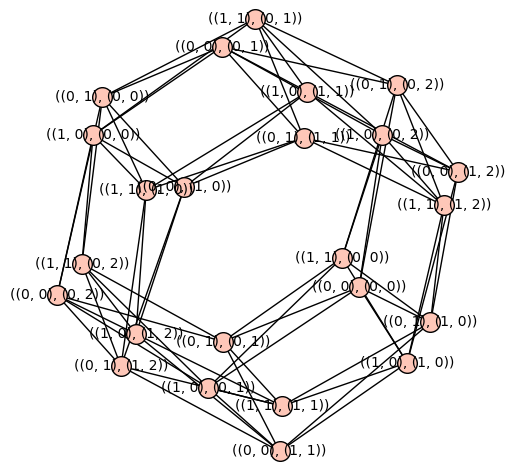

Krepki produkt grafov:


Metrična dimenzija: 5


Metrična dimenzija sosednosti: 5


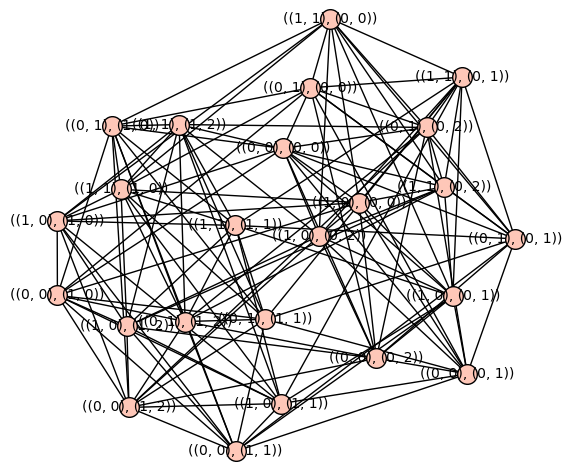

In [13]:
print("Produkti torusnih mrežnih grafov:")
print("")

n = 2
m = 2

print("Prvi torusni mrežni graf:")
T1 = torusni_mrezni_graf(n,m)
if dim(T1)[0] == dim_A(T1)[0]:
    print("Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.")
else:
    print("Metrična dimenzija in metrična dimenzija sosednosti sta RAZLIČNI.")
print("")

print("Drugi torusni mrežni graf:")    
T2 = torusni_mrezni_graf(n,m)
if dim(T2)[0] == dim_A(T2)[0]:
    print("Metrična dimenzija in metrična dimenzija sosednosti sta ENAKI.")
else:
    print("Metrična dimenzija in metrična dimenzija sosednosti sta RAZLIČNI.")
print("")


#1.  # izračunamo kartezični produkt
print("Kartezični produkt grafov:")
K1 = T1.cartesian_product(T2)

    # izpišemo podatke
print(f"Metrična dimenzija: {dim(K1)[0]}")
print(f"Metrična dimenzija sosednosti: {dim_A(K1)[0]}")

    # narišemo graf
K1.plot().show()


#2.  # izračunamo direktni produkt
print("Direktni produkt grafov:")
K2 = T1.tensor_product(T2)

    # izpišemo podatke
print(f"Metrična dimenzija: {dim(K2)[0]}")
print(f"Metrična dimenzija sosednosti: {dim_A(K2)[0]}")

    # narišemo graf
K2.plot().show()


#3.  # izračunamo krepki produkt
print("Krepki produkt grafov:")
K3 = T1.strong_product(T2)

    # izpišemo podatke
print(f"Metrična dimenzija: {dim(K3)[0]}")
print(f"Metrična dimenzija sosednosti: {dim_A(K3)[0]}")

    # narišemo graf   
K3.plot().show()

###### RAZMERJE MED dim\_A\(G\) in dim\(G\)



Računanje razmerja med metrično dimenzijo in metrično dimenzijo sosednosti.



In [0]:
def test_graf(g):
    
    print(f"Velikost grafa: {g}")
    metricna = dim(g)[0]
    metricna_sosednosti = dim_A(g)[0]

    razmerje = (metricna_sosednosti / metricna) if metricna > 0 else float('inf')
    print("Razmerje", razmerje)
    return metricna, metricna_sosednosti, razmerje


vsota = 0
for _ in range(10):
    
    max_razmerje = 0
    
    for n in range(3,30):
        
        G = nakljucni_povezan_graf(n, 1)  
        metricna, metricna_sosednosti, razmerje = test_graf(G)
        max_razmerje = max(max_razmerje, razmerje)
        print(f"Maksimalno razmerje: {max_razmerje}")
        
    vsota += max_razmerje
        
print(f"Povprecje maksimalnih razmerij: {vsota / 10}")

